In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,  mean_absolute_error


df = pd.read_csv("transformed_data.csv")

In [3]:
df.head()

,_id,id,title,release_date,popularity,vote_average,vote_count,release_year
0,661ec0a782636514977a4fb5,693134,Dune: Part Two,27-02-2024,4004.451,8.308,2868,2024
1,661ec0a782636514977a4fb6,1011985,Kung Fu Panda 4,02-03-2024,2981.987,7.139,1040,2024
2,661ec0a782636514977a4fb7,823464,Godzilla x Kong: The New Empire,27-03-2024,2405.980,6.723,617,2024
3,661ec0a782636514977a4fb8,601796,Alienoid,20-07-2022,1751.466,7.042,264,2022
4,661ec0a782636514977a4fb9,984324,The Wages of Fear,28-03-2024,1256.727,5.819,155,2024


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2321 entries, 0 to 2320
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _id           2321 non-null   object 
 1   id            2321 non-null   int64  
 2   title         2321 non-null   object 
 3   release_date  2321 non-null   object 
 4   popularity    2321 non-null   float64
 5   vote_average  2321 non-null   float64
 6   vote_count    2321 non-null   int64  
 7   release_year  2321 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 145.2+ KB


In [5]:
df.describe()

,id,popularity,vote_average,vote_count,release_year
count,2.321000e+03,2321.000000,2321.000000,2321.000000,2321.000000
mean,3.014933e+05,43.556460,6.472339,1793.600603,2006.580353
std,3.582402e+05,128.015432,1.215289,3208.650217,16.877593
min,1.300000e+01,10.904000,0.000000,0.000000,1910.000000
25%,1.154200e+04,21.140000,6.000000,184.000000,1999.000000
50%,8.613000e+04,26.967000,6.600000,676.000000,2011.000000
75%,5.148470e+05,39.971000,7.200000,1896.000000,2019.000000
max,1.270702e+06,4004.451000,10.000000,34092.000000,2029.000000


In [7]:
df.shape

(2321, 8)

In [8]:
# Check for missing values
print(df.isnull().sum())

_id             0
id              0
title           0
release_date    0
popularity      0
vote_average    0
vote_count      0
release_year    0
dtype: int64


In [ ]:
#There are no missing values

In [10]:
# Identify duplicate rows
duplicate_rows = df[df.duplicated()]

# Count the number of duplicate rows
duplicates = duplicate_rows.shape[0]
print("\n Number of duplicate rows:-  ", duplicates)


 Number of duplicate rows:-   0


In [ ]:
#There are no duplicates rows

id               1.006326
popularity      22.299933
vote_average    -2.508336
vote_count       4.086245
release_year    -1.578026
dtype: float64


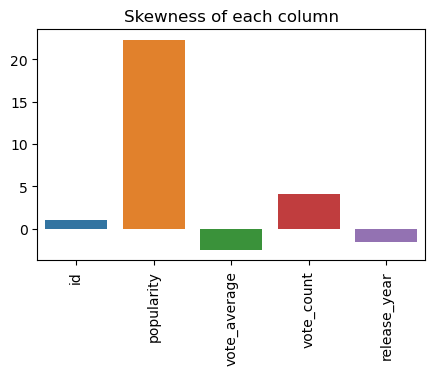

In [12]:
#Drop columns
df.drop(columns=['_id','title','release_date'], inplace=True)

#Skewness check
skewness = df.skew()
print(skewness)

#Plot bar plot for skewness
plt.figure(figsize=(5, 3))
sns.barplot(x=skewness.index, y=skewness.values)
plt.title('Skewness of each column')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Visualizing Numeric Features

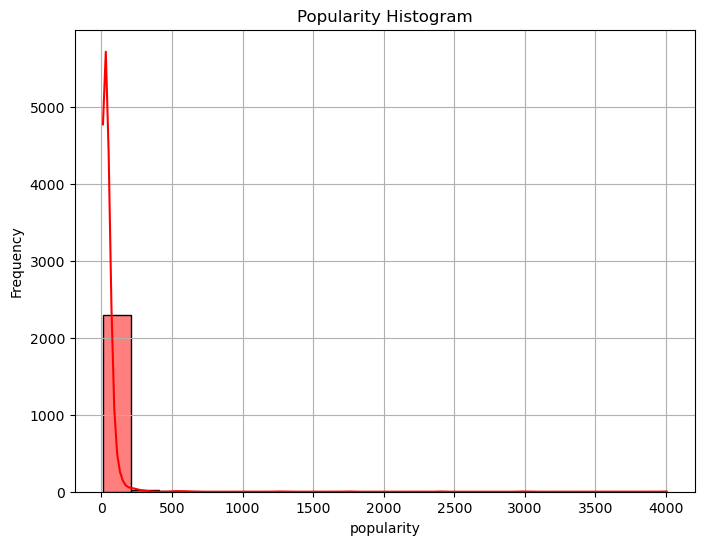

In [14]:
#1. Plot histogram with KDE for dependent variable popularity
plt.figure(figsize=(8, 6))
sns.histplot(df['popularity'], bins=20, kde=True, color='red', edgecolor='black')
plt.title('Popularity Histogram')
plt.xlabel('popularity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

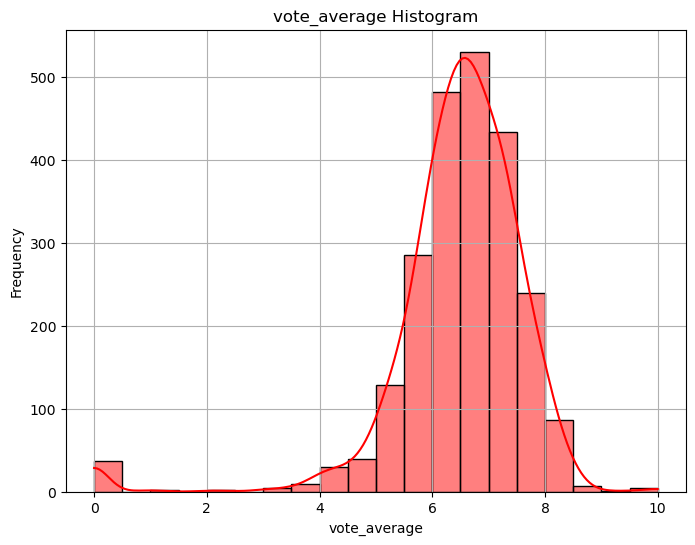

In [15]:
#2. Plot histogram with KDE for vote_average
plt.figure(figsize=(8, 6))
sns.histplot(df['vote_average'], bins=20, kde=True, color='red', edgecolor='black')
plt.title('vote_average Histogram')
plt.xlabel('vote_average')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

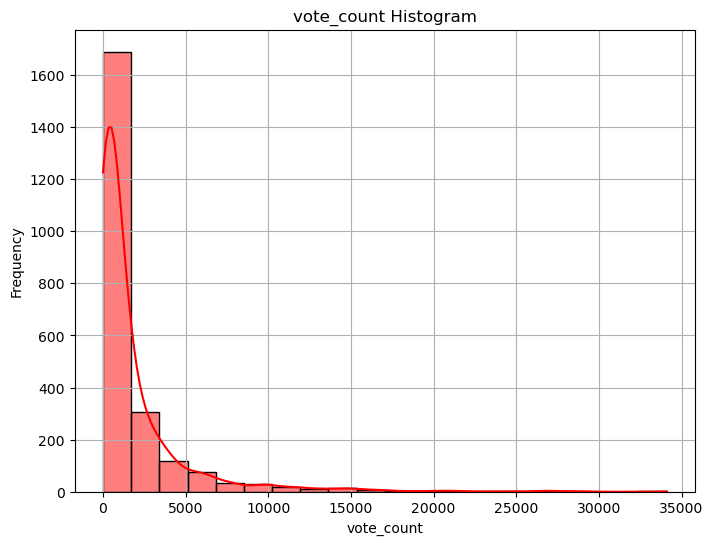

In [16]:
#3. Plot histogram with KDE for vote_count
plt.figure(figsize=(8, 6))
sns.histplot(df['vote_count'], bins=20, kde=True, color='red', edgecolor='black')
plt.title('vote_count Histogram')
plt.xlabel('vote_count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting a Histogram

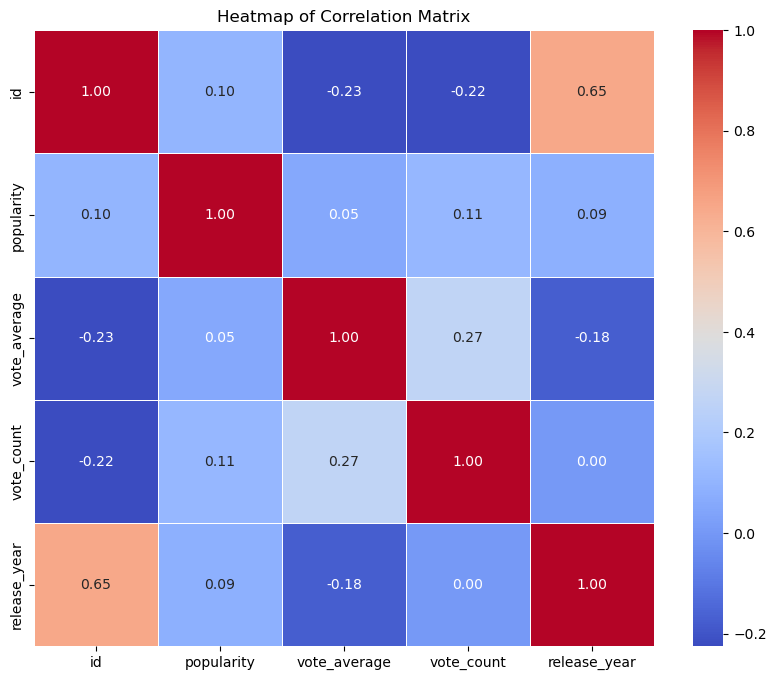

In [17]:
# The correlation matrix
co_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(co_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [ ]:
#Independent variables have less correlation

C:\Users\cw\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


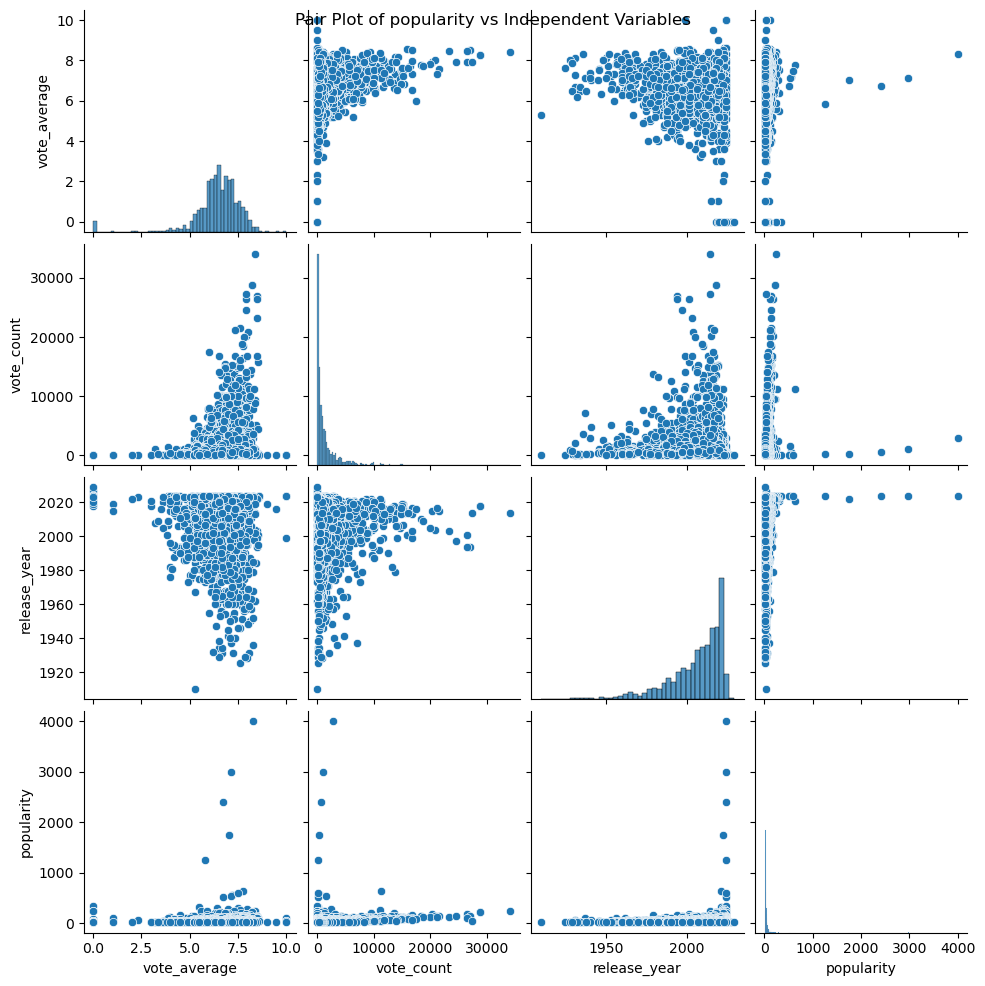

In [18]:
# Selecting the independent and dependent variables
independent_vars = ['vote_average', 'vote_count', 'release_year']
dependent_var = 'popularity'

# Create a DataFrame with selected variables
df1 = df[independent_vars + [dependent_var]]

# Plot pair plot
sns.pairplot(df1, kind='scatter')
plt.suptitle(f'Pair Plot of {dependent_var} vs Independent Variables')
plt.show()

C:\Users\cw\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


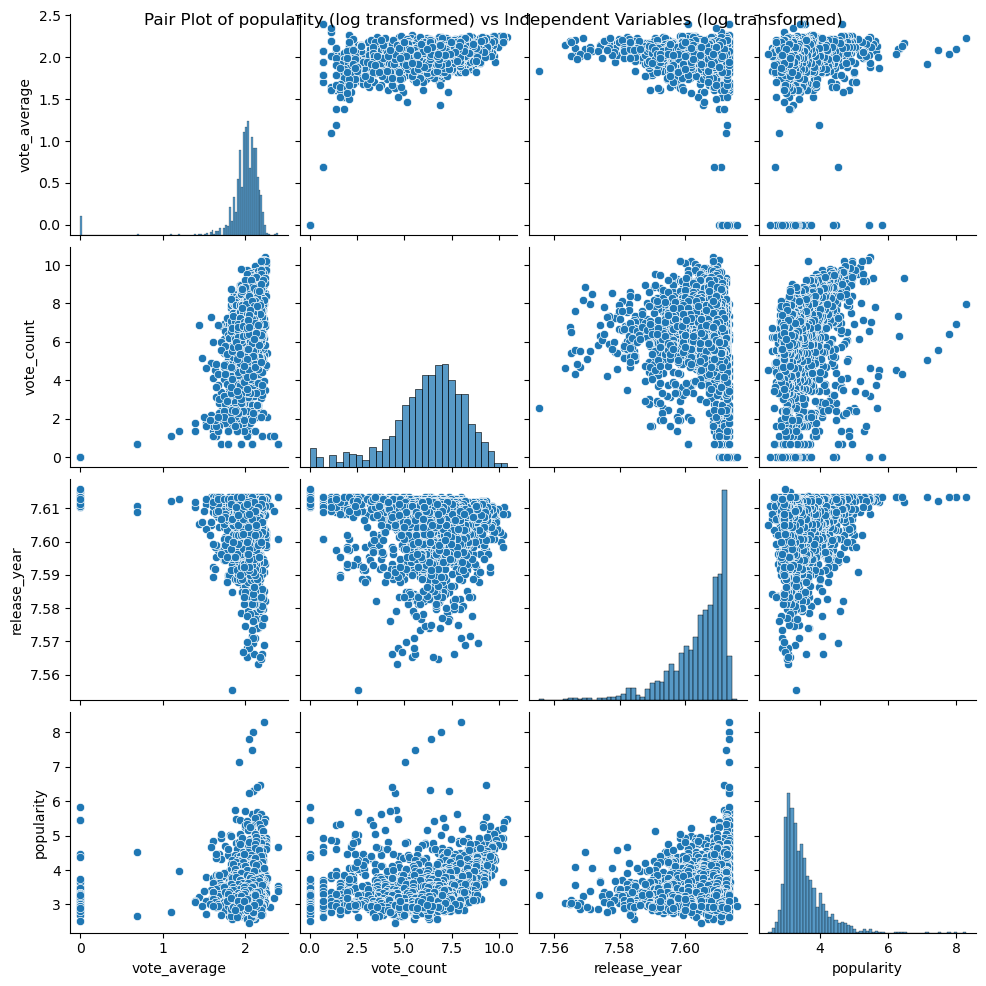

In [19]:
# Log transformation
dflog = df1.copy()
dflog[independent_vars] = np.log1p(df1[independent_vars])
dflog[dependent_var] = np.log1p(df1[dependent_var])

# Plot pair plot after log transformation
sns.pairplot(dflog, kind='scatter')
plt.suptitle(f'Pair Plot of {dependent_var} (log transformed) vs Independent Variables (log transformed)')
plt.show()

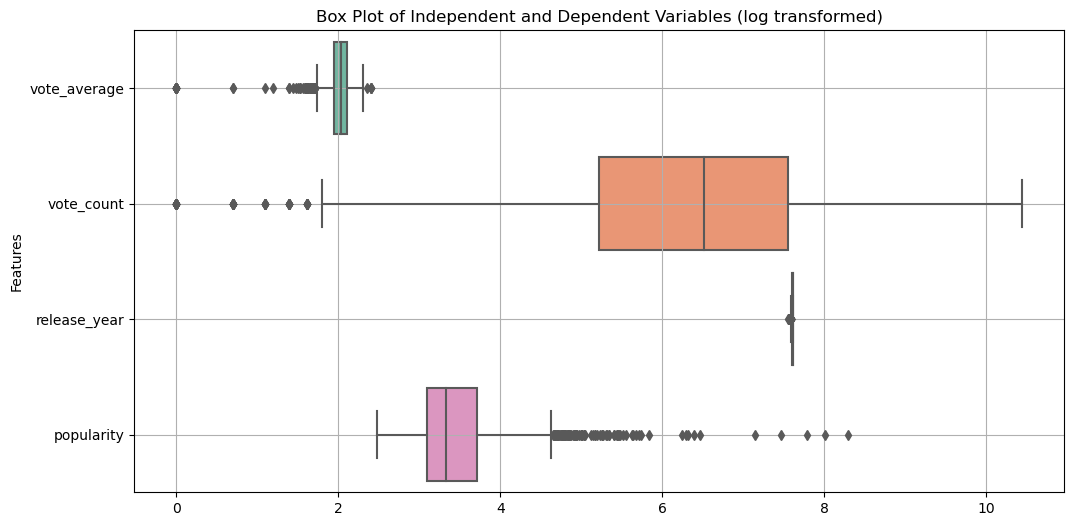

In [20]:
# Plot box plots of log-transformed variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=dflog, orient='h', palette='Set2')
plt.title('Box Plot of Independent and Dependent Variables (log transformed)')
plt.ylabel('Features')
plt.grid(True)
plt.show()

In [21]:
# Calculate the IQR for each numerical variable
Q1 = dflog.quantile(0.2)
Q3 = dflog.quantile(0.8)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (dflog < lower_bound) | (dflog > upper_bound)

# Filter out outliers
df2 = dflog[~outliers.any(axis=1)]

# Display the shape before and after removing outliers
print("Shape before removing outliers:", dflog.shape)
print("Shape after removing outliers:", df2.shape)

Shape before removing outliers: (2321, 4)
Shape after removing outliers: (2167, 4)


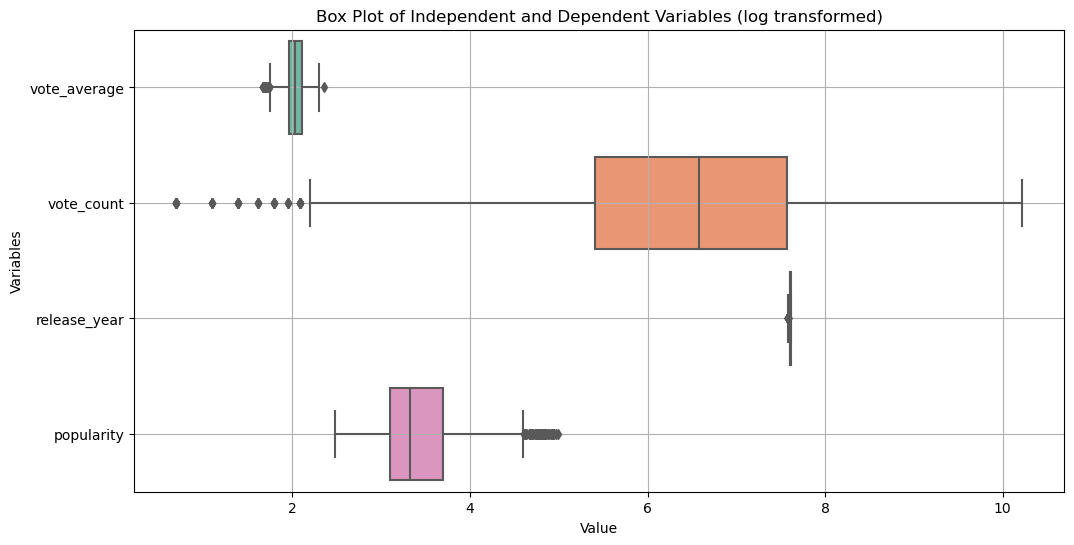

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df2, orient='h', palette='Set2')
plt.title('Box Plot of Independent and Dependent Variables (log transformed)')
plt.xlabel('Value')
plt.ylabel('Variables')
plt.grid(True)
plt.show()

In [23]:
df2.head()

,vote_average,vote_count,release_year,popularity
35,2.166651,5.129899,7.612831,4.816605
40,1.887070,5.030438,7.613325,4.786433
41,2.167910,9.707290,7.601902,4.992166
44,2.055789,7.479300,7.612831,4.892902
45,1.927019,4.127134,7.612831,4.800951


In [24]:
X1=df2.iloc[:,:-1].values
y1=df2.iloc[:,-1].values

In [25]:
# Split the dataset into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Add constant to X_train for intercept term
X_train = sm.add_constant(X_train)

# Fit OLS model
model = sm.OLS(y_train, X_train).fit()

# Print model summary
print(model.summary())

# Add constant to X_test for intercept term
X_test = sm.add_constant(X_test)

# Predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance (e.g., calculate MSE)
mse = np.mean((y_pred - y_test)**2)
print("Mean Squared Error (MSE):", mse)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     123.4
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           2.05e-72
Time:                        10:14:34   Log-Likelihood:                -973.04
No. Observations:                1733   AIC:                             1954.
Df Residuals:                    1729   BIC:                             1976.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -80.0241     10.490     -7.628      0.0

In [ ]:
# MODEL Complete